In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pylab as pl
import csv # csv module
import warnings #for disable purpose
import seaborn as sns #library for making statistical graphics
import os # for current directory
import glob
from sklearn.tree import DecisionTreeClassifier #For predict decision trees
from sklearn.model_selection import train_test_split, GridSearchCV #Split data
from sklearn.ensemble import RandomForestClassifier#Random forests
from sklearn import datasets #Random forests
from sklearn.cluster import KMeans #Library for clusters
from sklearn.preprocessing import MinMaxScaler#Used in clusters
from scipy import stats#for correlation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
from io import StringIO
import io
from pathlib import Path

In [4]:
pd.options.display.max_rows = 9999999999
#////////////////////////////////////////////////////////Import Dataset/////////////////////////////////////////////////////////////
base_dir = Path.home()
manipulated_data_directory = base_dir / "NaMinhaRua" / "Ficheiros de dados Manipulados"
ipmadataset = pd.read_csv(manipulated_data_directory / 'combined_ipma_data.csv')
ipmadataset = pd.DataFrame(ipmadataset)
print ("\nMissing values :  ", ipmadataset.isnull().sum().values.sum())



Missing values :   76025


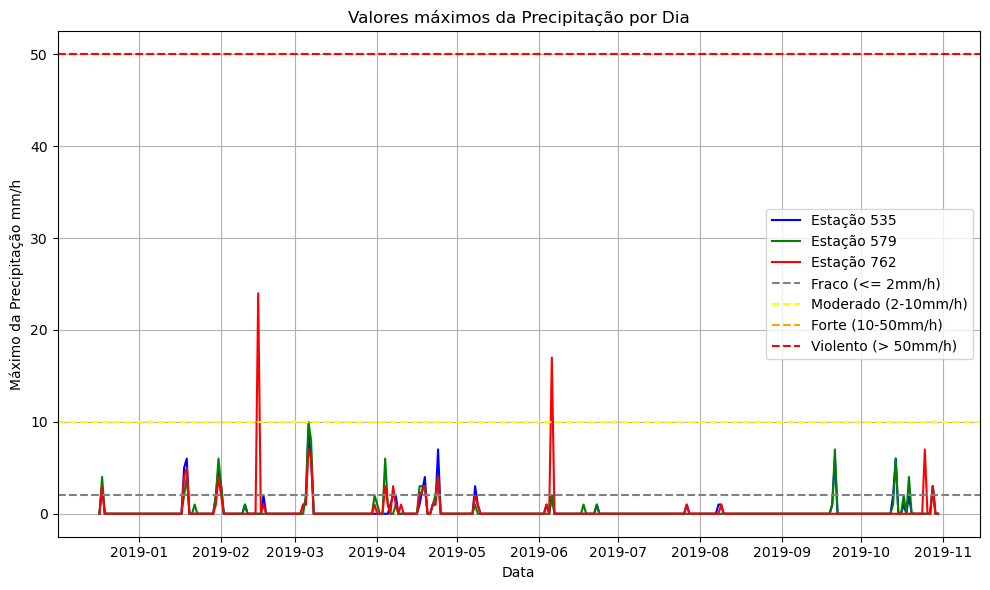

O dia que atingiu a precipitação máxima na estação 535 foi: 2019-03-06 9.0
O dia que atingiu a precipitação máxima na estação 579 foi: 2019-03-06 10.0
O dia que atingiu a precipitação máxima na estação 762 foi: 2019-02-15 24.0


In [5]:
#"precacumulada" max values until 2020

# Assuming that 'estacion' is the column that identifies the station
df_estacao_535 = ipmadataset[ipmadataset['estacion'] == 535]
df_estacao_579 = ipmadataset[ipmadataset['estacion'] == 579]
df_estacao_762 = ipmadataset[ipmadataset['estacion'] == 762]

# Convert 'fecha' column to datetime type
df_estacao_535['fecha'] = pd.to_datetime(df_estacao_535['fecha'])
df_estacao_579['fecha'] = pd.to_datetime(df_estacao_579['fecha'])
df_estacao_762['fecha'] = pd.to_datetime(df_estacao_762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_535 = df_estacao_535[df_estacao_535['precacumulada'] != -99.0]
df_filtrado_579 = df_estacao_579[df_estacao_579['precacumulada'] != -99.0]
df_filtrado_762 = df_estacao_762[df_estacao_762['precacumulada'] != -99.0]

# Group data by day and calculate the maximum verified
max_por_dia_535 = df_filtrado_535.groupby(df_filtrado_535['fecha'].dt.date)['precacumulada'].max()
max_por_dia_579 = df_filtrado_579.groupby(df_filtrado_579['fecha'].dt.date)['precacumulada'].max()
max_por_dia_762 = df_filtrado_762.groupby(df_filtrado_762['fecha'].dt.date)['precacumulada'].max()

# Chart
plt.figure(figsize=(10, 6))
max_por_dia_535.plot(color='blue', label='Estação 535')
max_por_dia_579.plot(color='green', label='Estação 579')
max_por_dia_762.plot(color='red', label='Estação 762')

# Add horizontal lines to categorize values
plt.axhline(y=2, color='gray', linestyle='--', label='Fraco (<= 2mm/h)')
plt.axhline(y=10, color='yellow', linestyle='--', label='Moderado (2-10mm/h)')
plt.axhline(y=50, color='orange', linestyle='--', label='Forte (10-50mm/h)')
plt.axhline(y=50, color='red', linestyle='--', label='Violento (> 50mm/h)')

# Adjust axis title and labels
plt.title('Valores máximos da Precipitação por Dia')
plt.xlabel('Data')
plt.ylabel('Máximo da Precipitação mm/h')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with maximum precipitation for each station
dia_max_precipitacao_535 = max_por_dia_535.idxmax()
valor_max_precipitacao_535 = max_por_dia_535.max()
dia_max_precipitacao_579 = max_por_dia_579.idxmax()
valor_max_precipitacao_579 = max_por_dia_579.max()
dia_max_precipitacao_762 = max_por_dia_762.idxmax()
valor_max_precipitacao_762 = max_por_dia_762.max()

print("O dia que atingiu a precipitação máxima na estação 535 foi:", dia_max_precipitacao_535,valor_max_precipitacao_535)
print("O dia que atingiu a precipitação máxima na estação 579 foi:", dia_max_precipitacao_579, valor_max_precipitacao_579)
print("O dia que atingiu a precipitação máxima na estação 762 foi:", dia_max_precipitacao_762, valor_max_precipitacao_762)

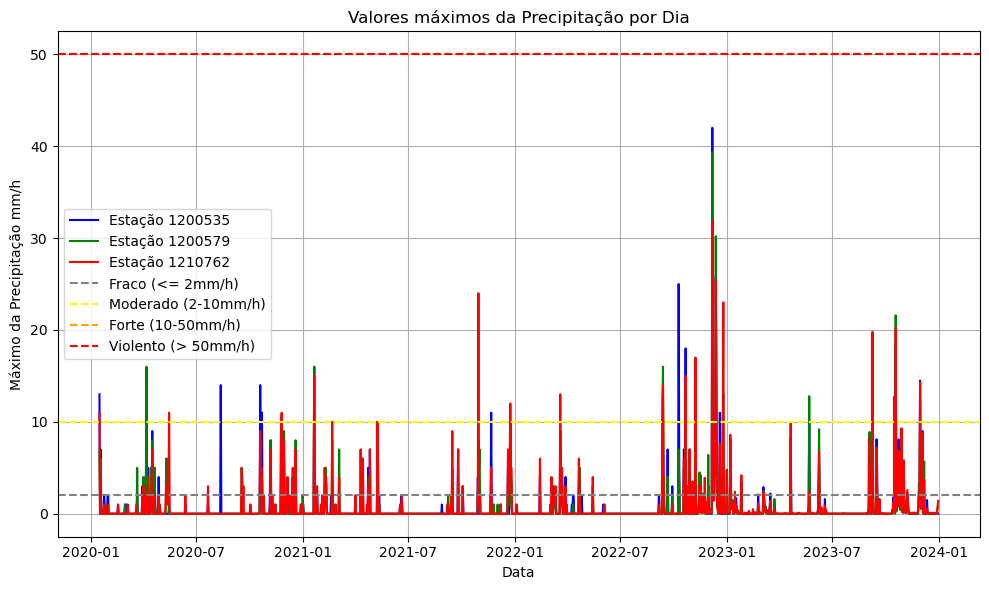

O dia que atingiu a precipitação máxima na estação 1200535 foi: 2022-12-07 42.0
O dia que atingiu a precipitação máxima na estação 1200579 foi: 2022-12-07 39.29999923706055
O dia que atingiu a precipitação máxima na estação 1210762 foi: 2022-12-07 31.89999961853028


In [6]:
# Maximum "precacumulated" values after 2020
# Assuming that 'estacion' is the column that identifies the station
df_estacao_535 = ipmadataset[ipmadataset['estacion'] == 1200535]
df_estacao_579 = ipmadataset[ipmadataset['estacion'] == 1200579]
df_estacao_762 = ipmadataset[ipmadataset['estacion'] == 1210762]

# Convert 'fecha' column to datetime type
df_estacao_535['fecha'] = pd.to_datetime(df_estacao_535['fecha'])
df_estacao_579['fecha'] = pd.to_datetime(df_estacao_579['fecha'])
df_estacao_762['fecha'] = pd.to_datetime(df_estacao_762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_535 = df_estacao_535[df_estacao_535['precacumulada'] != -99.0]
df_filtrado_579 = df_estacao_579[df_estacao_579['precacumulada'] != -99.0]
df_filtrado_762 = df_estacao_762[df_estacao_762['precacumulada'] != -99.0]

# Group data by day and calculate the maximum verified
max_por_dia_535 = df_filtrado_535.groupby(df_filtrado_535['fecha'].dt.date)['precacumulada'].max()
max_por_dia_579 = df_filtrado_579.groupby(df_filtrado_579['fecha'].dt.date)['precacumulada'].max()
max_por_dia_762 = df_filtrado_762.groupby(df_filtrado_762['fecha'].dt.date)['precacumulada'].max()

# Chart
plt.figure(figsize=(10, 6))
max_por_dia_535.plot(color='blue', label='Estação 1200535')
max_por_dia_579.plot(color='green', label='Estação 1200579')
max_por_dia_762.plot(color='red', label='Estação 1210762')

# Add horizontal lines to categorize values
plt.axhline(y=2, color='gray', linestyle='--', label='Fraco (<= 2mm/h)')
plt.axhline(y=10, color='yellow', linestyle='--', label='Moderado (2-10mm/h)')
plt.axhline(y=50, color='orange', linestyle='--', label='Forte (10-50mm/h)')
plt.axhline(y=50, color='red', linestyle='--', label='Violento (> 50mm/h)')

# Adjust axis title and labels
plt.title('Valores máximos da Precipitação por Dia')
plt.xlabel('Data')
plt.ylabel('Máximo da Precipitação mm/h')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with maximum precipitation for each station
dia_max_precipitacao_535 = max_por_dia_535.idxmax()
valor_max_precipitacao_535 = max_por_dia_535.max()
dia_max_precipitacao_579 = max_por_dia_579.idxmax()
valor_max_precipitacao_579 = max_por_dia_579.max()
dia_max_precipitacao_762 = max_por_dia_762.idxmax()
valor_max_precipitacao_762 = max_por_dia_762.max()

print("O dia que atingiu a precipitação máxima na estação 1200535 foi:", dia_max_precipitacao_535, valor_max_precipitacao_535 )
print("O dia que atingiu a precipitação máxima na estação 1200579 foi:", dia_max_precipitacao_579,valor_max_precipitacao_579)
print("O dia que atingiu a precipitação máxima na estação 1210762 foi:", dia_max_precipitacao_762, valor_max_precipitacao_762)

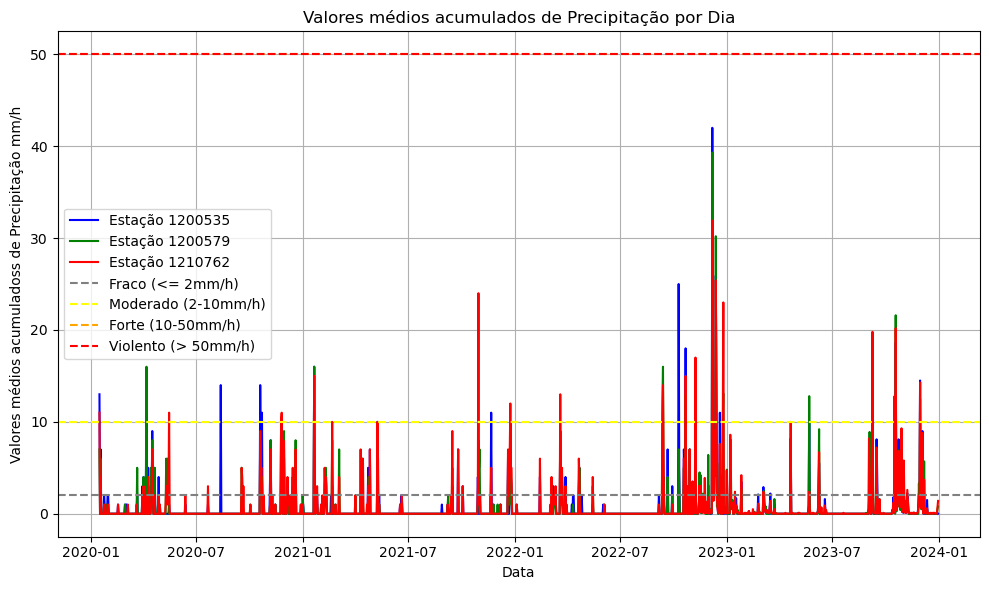

O dia com maior soma de precipitação na estação 535 foi: 2019-10-14 15.0
O dia com maior soma de precipitação na estação 579 foi: 2019-10-14 14.0
O dia com maior soma de precipitação na estação 762 foi: 2019-02-15 23.0


In [7]:
#Pre 2020 Cumulative average


# Assuming that 'estacion' is the column that identifies the station
df_estacao_535 = ipmadataset[ipmadataset['estacion'] == 535]
df_estacao_579 = ipmadataset[ipmadataset['estacion'] == 579]
df_estacao_762 = ipmadataset[ipmadataset['estacion'] == 762]

# Convert 'fecha' column to datetime type
df_estacao_535['fecha'] = pd.to_datetime(df_estacao_535['fecha'])
df_estacao_579['fecha'] = pd.to_datetime(df_estacao_579['fecha'])
df_estacao_762['fecha'] = pd.to_datetime(df_estacao_762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_535 = df_estacao_535[df_estacao_535['precacumulada'] != -99.0]
df_filtrado_579 = df_estacao_579[df_estacao_579['precacumulada'] != -99.0]
df_filtrado_762 = df_estacao_762[df_estacao_762['precacumulada'] != -99.0]

# Group data by day and calculate the maximum verified
soma_por_dia_535 = df_filtrado_535.groupby(df_filtrado_535['fecha'].dt.date)['precacumulada'].sum()/24
soma_por_dia_579 = df_filtrado_579.groupby(df_filtrado_579['fecha'].dt.date)['precacumulada'].sum()/24
soma_por_dia_762 = df_filtrado_762.groupby(df_filtrado_762['fecha'].dt.date)['precacumulada'].sum()/24

# Chart
plt.figure(figsize=(10, 6))
max_por_dia_535.plot(color='blue', label='Estação 1200535')
max_por_dia_579.plot(color='green', label='Estação 1200579')
max_por_dia_762.plot(color='red', label='Estação 1210762')

# Add horizontal lines to categorize values
plt.axhline(y=2, color='gray', linestyle='--', label='Fraco (<= 2mm/h)')
plt.axhline(y=10, color='yellow', linestyle='--', label='Moderado (2-10mm/h)')
plt.axhline(y=50, color='orange', linestyle='--', label='Forte (10-50mm/h)')
plt.axhline(y=50, color='red', linestyle='--', label='Violento (> 50mm/h)')

# Adjust axis title and labels
plt.title('Valores médios acumulados de Precipitação por Dia')
plt.xlabel('Data')
plt.ylabel('Valores médios acumuladoss de Precipitação mm/h')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with the highest amount of precipitation for each station
dia_max_precipitacao_535 = soma_por_dia_535.idxmax()
valor_max_precipitacao_535 = soma_por_dia_535.max()
dia_max_precipitacao_579 = soma_por_dia_579.idxmax()
valor_max_precipitacao_579 = soma_por_dia_579.max()
dia_max_precipitacao_762 = soma_por_dia_762.idxmax()
valor_max_precipitacao_762 = soma_por_dia_762.max()

print("O dia com maior soma de precipitação na estação 535 foi:", dia_max_precipitacao_535,valor_max_precipitacao_535)
print("O dia com maior soma de precipitação na estação 579 foi:", dia_max_precipitacao_579, valor_max_precipitacao_579)
print("O dia com maior soma de precipitação na estação 762 foi:", dia_max_precipitacao_762, valor_max_precipitacao_762)

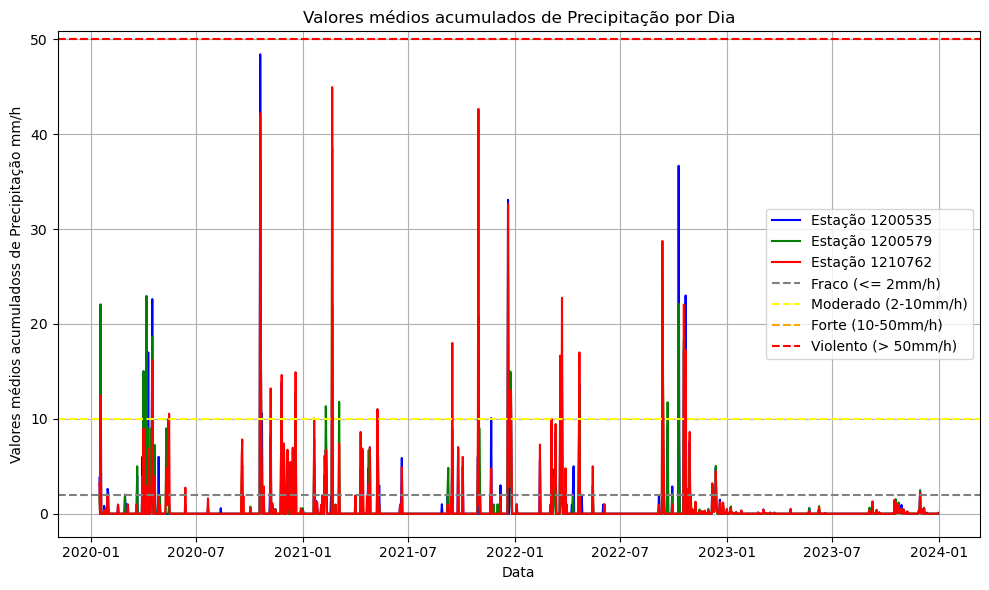

O dia com maior soma de precipitação na estação 535 foi: 2020-10-19 48.416666666666664
O dia com maior soma de precipitação na estação 579 foi: 2021-02-20 38.583333333333336
O dia com maior soma de precipitação na estação 762 foi: 2021-02-20 44.958333333333336


In [8]:
#After 2020

# Assuming that 'estacion' is the column that identifies the station
df_estacao_1200535 = ipmadataset[ipmadataset['estacion'] == 1200535]
df_estacao_1200579 = ipmadataset[ipmadataset['estacion'] == 1200579]
df_estacao_1210762 = ipmadataset[ipmadataset['estacion'] == 1210762]

# Convert 'fecha' column to datetime type
df_estacao_1200535['fecha'] = pd.to_datetime(df_estacao_1200535['fecha'])
df_estacao_1200579['fecha'] = pd.to_datetime(df_estacao_1200579['fecha'])
df_estacao_1210762['fecha'] = pd.to_datetime(df_estacao_1210762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_1200535 = df_estacao_1200535[df_estacao_1200535['precacumulada'] != -99.0]
df_filtrado_1200579 = df_estacao_1200579[df_estacao_1200579['precacumulada'] != -99.0]
df_filtrado_1210762 = df_estacao_1210762[df_estacao_1210762['precacumulada'] != -99.0]

# Group data by day and calculate the maximum verified
soma_por_dia_1200535 = df_filtrado_1200535.groupby(df_filtrado_1200535['fecha'].dt.date)['precacumulada'].sum()/24
soma_por_dia_1200579 = df_filtrado_1200579.groupby(df_filtrado_1200579['fecha'].dt.date)['precacumulada'].sum()/24
soma_por_dia_1210762 = df_filtrado_1210762.groupby(df_filtrado_1210762['fecha'].dt.date)['precacumulada'].sum()/24

# Chart
plt.figure(figsize=(10, 6))
soma_por_dia_1200535.plot(color='blue', label='Estação 1200535')
soma_por_dia_1200579.plot(color='green', label='Estação 1200579')
soma_por_dia_1210762.plot(color='red', label='Estação 1210762')

# Add horizontal lines to categorize values
plt.axhline(y=2, color='gray', linestyle='--', label='Fraco (<= 2mm/h)')
plt.axhline(y=10, color='yellow', linestyle='--', label='Moderado (2-10mm/h)')
plt.axhline(y=50, color='orange', linestyle='--', label='Forte (10-50mm/h)')
plt.axhline(y=50, color='red', linestyle='--', label='Violento (> 50mm/h)')


# Adjust axis title and labels
plt.title('Valores médios acumulados de Precipitação por Dia')
plt.xlabel('Data')
plt.ylabel('Valores médios acumuladoss de Precipitação mm/h')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with the highest amount of precipitation for each station
dia_max_precipitacao_1200535 = soma_por_dia_1200535.idxmax()
valor_max_precipitacao_1200535 = soma_por_dia_1200535.max()
dia_max_precipitacao_1200579 = soma_por_dia_1200579.idxmax()
valor_max_precipitacao_1200579 = soma_por_dia_1200579.max()
dia_max_precipitacao_1210762 = soma_por_dia_1210762.idxmax()
valor_max_precipitacao_1210762 = soma_por_dia_1210762.max()

print("O dia com maior soma de precipitação na estação 535 foi:", dia_max_precipitacao_1200535, valor_max_precipitacao_1200535)
print("O dia com maior soma de precipitação na estação 579 foi:", dia_max_precipitacao_1200579, valor_max_precipitacao_1200579)
print("O dia com maior soma de precipitação na estação 762 foi:", dia_max_precipitacao_1210762, valor_max_precipitacao_1210762)

In [5]:
# Day by station analysis
ipmadataset['fecha'] = pd.to_datetime(ipmadataset['fecha'])

# Choose the specific day to analyze
dia_especifico = '2020-10-19'
dia_especifico = pd.to_datetime(dia_especifico).date()

# Choose the specific station to analyze
estacao_especifica = 1200535

# Filter the DataFrame to only get data for the specific day and specific station
dados_filtrados = ipmadataset[(ipmadataset['fecha'].dt.date == dia_especifico) & (ipmadataset['estacion'] == estacao_especifica)]

# Extract the values from the 'precacumulated' column for the specific day and specific station
valores_precacumulada = dados_filtrados['precacumulada'].tolist()

# Count the number of readings
numero_de_leituras = dados_filtrados.shape[0]

# Calculate the sum of the 'precacumulada' values
soma_precacumulada = dados_filtrados['precacumulada'].sum()

print("Valores de precacumulada para o dia", dia_especifico, "na estação", estacao_especifica, ":", valores_precacumulada)
print("Número de leituras para o dia", dia_especifico, "na estação", estacao_especifica, ":", numero_de_leituras)
print("Soma dos valores de precacumulada para o dia", dia_especifico, "na estação", estacao_especifica, ":", soma_precacumulada)

Valores de precacumulada para o dia 2020-10-19 na estação 1200535 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 8.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 2.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0

In [9]:
ipmadataset.to_csv('combined_ipma_precacumulada_data.csv', index=False)

In [4]:
ipmadataset = pd.read_csv("C:/Users/jmvdp/Dados/combined_ipma_precacumulada_data.csv")
print(ipmadataset.head())

                           entity_id  estacion  humidade  iddireccvento  \
0  ipma.estacionesMetereologicas.535       535        81            0.0   
1  ipma.estacionesMetereologicas.535       535        90            0.0   
2  ipma.estacionesMetereologicas.535       535        88            0.0   
3  ipma.estacionesMetereologicas.535       535        90            0.0   
4  ipma.estacionesMetereologicas.535       535        92            0.0   

   intensidadeventokm  precacumulada      pressao  radiacao  temperatura  \
0               -99.0            0.0  1029.699951     -99.0         11.0   
1               -99.0            0.0  1031.699951     -99.0         10.0   
2               -99.0            0.0  1032.800049     -99.0         14.0   
3               -99.0            0.0  1031.000000     -99.0         10.0   
4               -99.0            0.0  1028.800049     -99.0          9.0   

                 fecha                 entity_ts   date_only  \
0  2018-12-23 12:00:00  2018